created on Jan 26, 2025
By Kimia

##Part A
#1 and 2 import modules and dataset

In [97]:
##part A
# 1) import modules

import numpy as np
import pandas as pd
import openpyxl

from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend
# For plotting
import matplotlib.pyplot as plt
# import seaborn as sns # (not essential)
# sns.set_theme('talk', style = 'white')

In [98]:
#*******by changing "rgdpe_pc" to "rgdpe" we can have the whole analysis for real GDP as well*****
# 2.1) Load dataset 
data0 = pd.read_excel('pwt100.xlsx', sheet_name = 'Data', header = 0, engine='openpyxl')

# 2.2) Clean data
# Subseting relevant columns and compute per capita real GDP
data = data0.loc[:, ("country", "year", "rgdpe", "pop")]
data1 = data0.loc[:, ("country", "year", "rgdpe", "pop")]
data["rgdpe_pc"] = data["rgdpe"] / data["pop"]


# select our country (India)
data = data.loc[data["country"] == "India", ("year", "rgdpe_pc")].reset_index(drop=True)
data1 = data1.loc[data1["country"] == "India", ("year", "rgdpe")]
# Reset the index (not crucial)
data = data.reset_index(drop = True)
data1 = data1.reset_index(drop = True) #it is defined for saving real GDP for our country and using it for further graphs!

# Subset the RGDP per capita series
ymax = 2019
ymin = 1950
# We use logical indexing to subset the data to rows of years ymin <= year <= ymax
Y = data.loc[np.logical_and(data["year"] <= ymax, data["year"] >= ymin), "rgdpe_pc"]
y = np.log(Y)
data = data[data["year"] >= ymin] # we keep only years after ymin

# Compute separate sample sizes for the subsample used for estimation and the whole sample.
T = len(Y) # sample size used for regression
T_all = data["year"].max() - (ymin - 1) # number of all years in the data after ymin



#3
Next, we want to compute four different specifications to see which one is a better fit:
Noted that we do all 4 with realGDP/capita and use the result for sketching real GDP as well.
(3.1) additive + linear : GDP = a + b.t
(3.2) additive + quadratic: GDP = a + b.t + c.(t)^2
(3.3) exponential + linear: ln(GDP) = a + b.t
(3.4) exponential + quadratic: ln(GDP) = a + b.t + c.(t)^2


Text(0.5, 1.0, 'Linear Additive: GDP & trend')

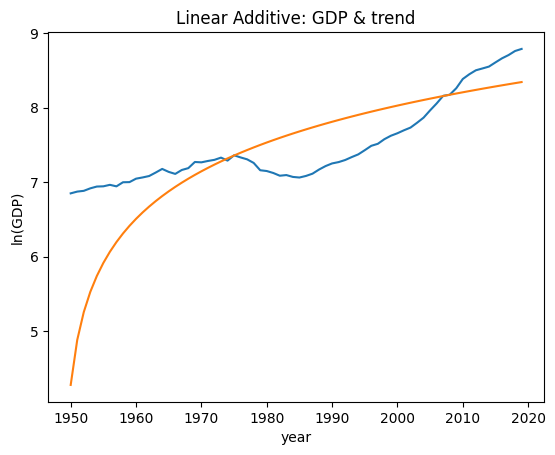

In [99]:
# 3.1) Additive Linear Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is per capita GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

# Initialise predicted values yhat
Yhat_add_lin = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

lw = 4


plt.figure()
#one could add options such as a particular size and use instead
#plt.figure(figsize=(7, 5))
plt.plot(data['year'],np.log(data['rgdpe_pc']))
plt.plot(data['year'],yhat_add_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Linear Additive: GDP & trend")


Text(0.5, 1.0, 'Additive Quadratic Model: GDP & Trend')

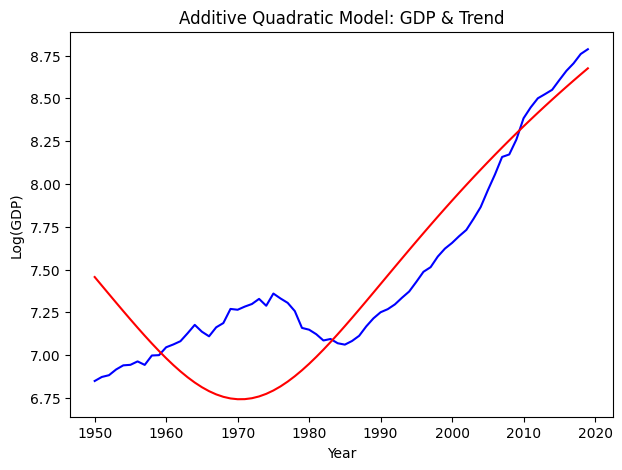

In [100]:
# 3.2) Additive Quadratic Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# Third regressor x3 is the vector 1^2, 2^2, ..., T^2
x1 = np.empty(T)  # Initialize an empty vector for the first regressor (ones)
x2 = np.empty(T)  # Initialize an empty vector for the second regressor (t)
x3 = np.empty(T)  # Initialize an empty vector for the third regressor (t^2)

for t in range(T):
    x1[t] = 1.  # Vector of ones (intercept)
    x2[t] = t + 1  # Time variable (1, 2, ..., T)
    x3[t] = (t + 1) ** 2  # Time squared variable (1^2, 2^2, ..., T^2)

# Run the regression for the additive quadratic model (GDP ~ t + t^2)
a_add_quad, b_add_quad_t, b_add_quad_t2 = get_regression_coefs(Y, x1, x2, x3)

# Initialize predicted values yhat
Yhat_add_quad = np.empty(T_all)

# Compute the predicted trend for all years
for t in range(T_all):
    Yhat_add_quad[t] = a_add_quad + b_add_quad_t * (t + 1) + b_add_quad_t2 * (t + 1)**2

# Let us convert the trend into log-units
yhat_add_quad = np.log(Yhat_add_quad)

# Plot the actual data and the predicted trend
plt.figure(figsize=(7, 5))
plt.plot(data['year'], np.log(data['rgdpe_pc']), label="Log(GDP) Actual", color='blue')
plt.plot(data['year'], yhat_add_quad, label="Log(GDP) Trend (Additive Quadratic)", color='red')

# Labels
plt.xlabel("Year")
plt.ylabel("Log(GDP)")

# Title
plt.title("Additive Quadratic Model: GDP & Trend")

Text(0.5, 1.0, 'Exponential + Linear Model: GDP & Trend')

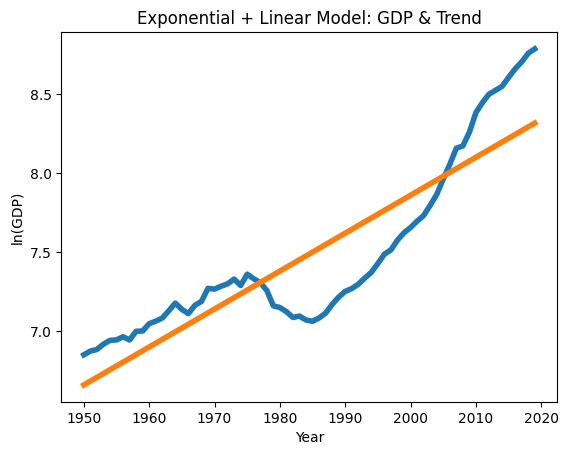

In [101]:
# 3.3) Exponential + Linear Model
# The dependent variable is ln(GDP), which corresponds to exponential growth of GDP.

# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
x1 = np.empty(T)  # initialize an empty vector for the first regressor
x2 = np.empty(T)  # initialize an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1  # recall Python starts indexing at 0

# Use the log of GDP as the dependent variable (ln(GDP))
ln_Y = np.log(Y)

# Get coefficients for the exponential + linear model
a_exp_lin, b_exp_lin = get_regression_coefs(ln_Y, x1, x2)

# Initialize predicted values ln_yhat for all years
ln_Yhat_exp_lin = np.empty(T_all)

# Compute predicted trend for all years using the model ln(Y) = a + b*t
for t in range(T_all):
    ln_Yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1)  # recall Python indexing starts at 0

# Convert predicted values from log-units back to levels (GDP)
Yhat_exp_lin = np.exp(ln_Yhat_exp_lin)

# Plot the results
plt.figure()
plt.plot(data["year"], np.log(data["rgdpe_pc"]), label="Observed ln(GDP)", linewidth=lw)
plt.plot(data["year"], np.log(Yhat_exp_lin), label="Trend (Exponential + Linear)", linewidth=lw)

# Labels and title
plt.xlabel("Year")
plt.ylabel("ln(GDP)")
plt.title("Exponential + Linear Model: GDP & Trend")

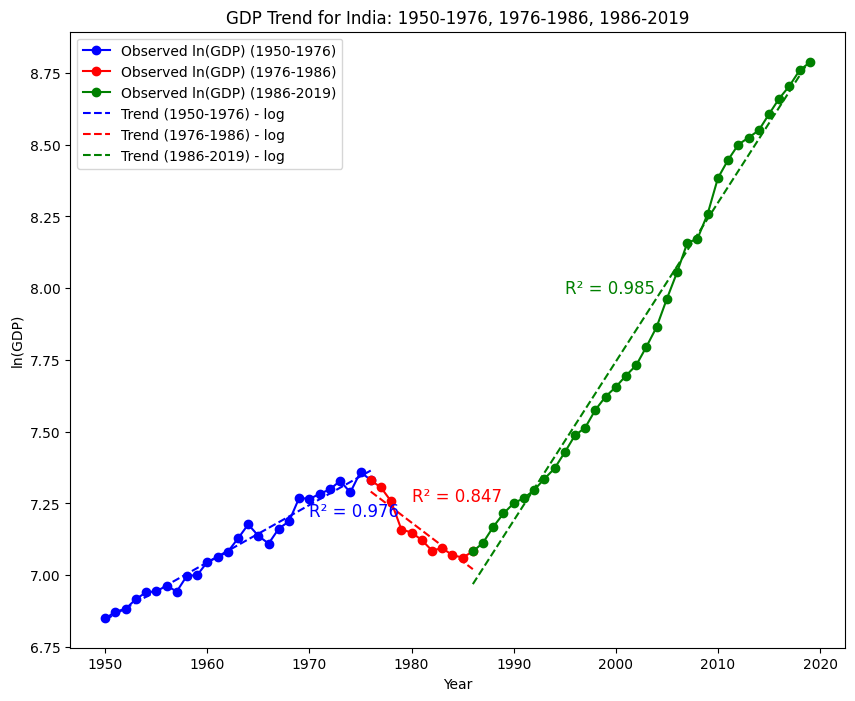

In [102]:
# Find best-fit for each subperiod

# Function to calculate R²
def calculate_r_squared(y_true, y_pred):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    total_sum_of_squares = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

# Define the three periods
ymin1, ymax1 = 1950, 1976
ymin2, ymax2 = 1976, 1986
ymin3, ymax3 = 1986, 2019

# Subset data for each period
data_50_76 = data[(data["year"] >= ymin1) & (data["year"] <= ymax1)]
data_76_86 = data[(data["year"] >= ymin2) & (data["year"] <= ymax2)]
data_86_19 = data[(data["year"] >= ymin3) & (data["year"] <= ymax3)]

# Get GDP series for regression
Y_50_76 = data_50_76["rgdpe_pc"]
Y_76_86 = data_76_86["rgdpe_pc"]
Y_86_19 = data_86_19["rgdpe_pc"]

ln_Y_50_76 = np.log(Y_50_76)
ln_Y_76_86 = np.log(Y_76_86)
ln_Y_86_19 = np.log(Y_86_19)

# Sample sizes
T_50_76 = len(Y_50_76)
T_76_86 = len(Y_76_86)
T_86_19 = len(Y_86_19)

# Create regressors for each period
x1_50_76 = np.ones(T_50_76)
x2_50_76 = np.arange(1, T_50_76 + 1)

x1_76_86 = np.ones(T_76_86)
x2_76_86 = np.arange(1, T_76_86 + 1)

x1_86_19 = np.ones(T_86_19)
x2_86_19 = np.arange(1, T_86_19 + 1)

# Get regression coefficients using get_regression_coefs for each period (log-level)
coefs_50_76 = get_regression_coefs(ln_Y_50_76, x1_50_76, x2_50_76)
coefs_76_86 = get_regression_coefs(ln_Y_76_86, x1_76_86, x2_76_86)
coefs_86_19 = get_regression_coefs(ln_Y_86_19, x1_86_19, x2_86_19)

# Extract coefficients (intercept and slope)
a_exp_lin_50_76, b_exp_lin_50_76 = coefs_50_76
a_exp_lin_76_86, b_exp_lin_76_86 = coefs_76_86
a_exp_lin_86_19, b_exp_lin_86_19 = coefs_86_19

# Compute predicted trends (log-level)
ln_Yhat_exp_lin_50_76 = a_exp_lin_50_76 + b_exp_lin_50_76 * x2_50_76
ln_Yhat_exp_lin_76_86 = a_exp_lin_76_86 + b_exp_lin_76_86 * x2_76_86
ln_Yhat_exp_lin_86_19 = a_exp_lin_86_19 + b_exp_lin_86_19 * x2_86_19

# Calculate R² for log-level data
r_squared_50_76 = calculate_r_squared(ln_Y_50_76, ln_Yhat_exp_lin_50_76)
r_squared_76_86 = calculate_r_squared(ln_Y_76_86, ln_Yhat_exp_lin_76_86)
r_squared_86_19 = calculate_r_squared(ln_Y_86_19, ln_Yhat_exp_lin_86_19)



# Plot results (log-level)
plt.figure(figsize=(10, 8))

# True data (log-level)
plt.plot(data_50_76["year"], np.log(Y_50_76), 'bo-', label="Observed ln(GDP) (1950-1976)")
plt.plot(data_76_86["year"], np.log(Y_76_86), 'ro-', label="Observed ln(GDP) (1976-1986)")
plt.plot(data_86_19["year"], np.log(Y_86_19), 'go-', label="Observed ln(GDP) (1986-2019)")

# Regression trends (log-level)
plt.plot(data_50_76["year"], ln_Yhat_exp_lin_50_76, 'b--', label="Trend (1950-1976) - log")
plt.plot(data_76_86["year"], ln_Yhat_exp_lin_76_86, 'r--', label="Trend (1976-1986) - log")
plt.plot(data_86_19["year"], ln_Yhat_exp_lin_86_19, 'g--', label="Trend (1986-2019) - log")


# Annotate R² values on the plot
plt.text(1970, np.log(Y_50_76).mean() + 0.1, f"R² = {r_squared_50_76:.3f}", color='blue', fontsize=12)
plt.text(1980, np.log(Y_76_86).mean() + 0.1, f"R² = {r_squared_76_86:.3f}", color='red', fontsize=12)
plt.text(1995, np.log(Y_86_19).mean() + 0.1, f"R² = {r_squared_86_19:.3f}", color='green', fontsize=12)


# Labels & title
plt.xlabel("Year")
plt.ylabel("ln(GDP)")
plt.title("GDP Trend for India: 1950-1976, 1976-1986, 1986-2019")
plt.legend()
plt.show()


##Levels vs log levels:

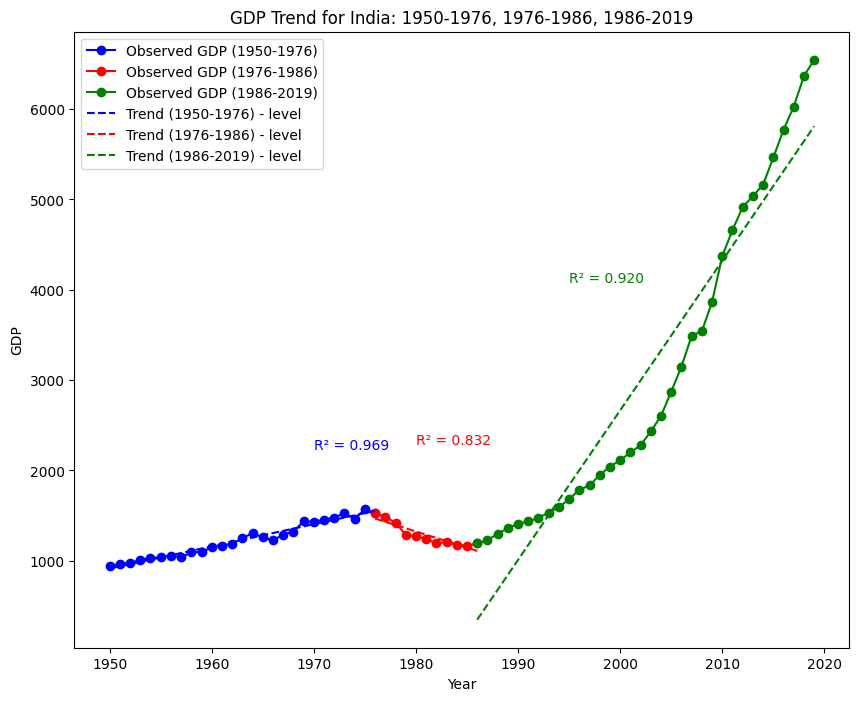

In [103]:
# As a robustness exercise, use the levels instead of log levels in the trend:
# Get regression coefficients using get_regression_coefs for each period (level)
coefs_50_76_level = get_regression_coefs(Y_50_76, x1_50_76, x2_50_76)
coefs_76_86_level = get_regression_coefs(Y_76_86, x1_76_86, x2_76_86)
coefs_86_19_level = get_regression_coefs(Y_86_19, x1_86_19, x2_86_19)

# Extract coefficients for level data
a_exp_lin_50_76_level, b_exp_lin_50_76_level = coefs_50_76_level
a_exp_lin_76_86_level, b_exp_lin_76_86_level = coefs_76_86_level
a_exp_lin_86_19_level, b_exp_lin_86_19_level = coefs_86_19_level

# Compute predicted trends (level)
Yhat_exp_lin_50_76 = a_exp_lin_50_76_level + b_exp_lin_50_76_level * x2_50_76
Yhat_exp_lin_76_86 = a_exp_lin_76_86_level + b_exp_lin_76_86_level * x2_76_86
Yhat_exp_lin_86_19 = a_exp_lin_86_19_level + b_exp_lin_86_19_level * x2_86_19

# Calculate R² for level data
r_squared_50_76_level = calculate_r_squared(Y_50_76, Yhat_exp_lin_50_76)
r_squared_76_86_level = calculate_r_squared(Y_76_86, Yhat_exp_lin_76_86)
r_squared_86_19_level = calculate_r_squared(Y_86_19, Yhat_exp_lin_86_19)


# Plot results (level)
plt.figure(figsize=(10, 8))


# True data (level)
plt.plot(data_50_76["year"], Y_50_76, 'bo-', label="Observed GDP (1950-1976)")
plt.plot(data_76_86["year"], Y_76_86, 'ro-', label="Observed GDP (1976-1986)")
plt.plot(data_86_19["year"], Y_86_19, 'go-', label="Observed GDP (1986-2019)")

# Regression trends (level)
plt.plot(data_50_76["year"], Yhat_exp_lin_50_76, 'b--', label="Trend (1950-1976) - level")
plt.plot(data_76_86["year"], Yhat_exp_lin_76_86, 'r--', label="Trend (1976-1986) - level")
plt.plot(data_86_19["year"], Yhat_exp_lin_86_19, 'g--', label="Trend (1986-2019) - level")

# Annotate R² values on the plot
plt.text(1970, Y_50_76.mean() + 1000, f"R² = {r_squared_50_76_level:.3f}", color='blue', fontsize=10)
plt.text(1980, Y_76_86.mean() + 1000, f"R² = {r_squared_76_86_level:.3f}", color='red', fontsize=10)
plt.text(1995, Y_86_19.mean() + 1000, f"R² = {r_squared_86_19_level:.3f}", color='green', fontsize=10)


# Labels & title
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP Trend for India: 1950-1976, 1976-1986, 1986-2019")
plt.legend()
plt.show()




When we use levels instead of log levels in a trend regression of GDP over time, the shape of the GDP-time graph will change more significantly, So non-Stationarity Becomes More Apparent; GDP in levels tends to grow exponentially over time, so plotting GDP against time as we can see, show a steeply increasing curve rather than a straight line. In contrast, the log-transformed GDP would have shown a more linear trend, making it easier to interpret long-term growth rates (the slope of the regression line represents the approximate percentage growth rate of GDP). Moreover, using levels can lead to heteroskedastic residuals (variance increasing over time), making the model less reliable. 
However, using GDP levels is more appropriate for short-term analysis because it captures absolute changes, which are crucial for policymakers and analysts focusing on immediate economic shifts. Unlike log GDP, which emphasizes percentage growth, GDP levels better reflect the actual magnitude of recessions, crises, or policy interventions. Short-term trends do not always follow exponential growth, making a linear approach in levels more suitable. Additionally, absolute GDP figures are often more intuitive for decision-making in fiscal and monetary policy. In contrast, log GDP is preferred for long-term trend analysis as it accounts for exponential growth, stabilizes variance, and avoids spurious regression issues. 
Ultimately, while log GDP is better for understanding long-run growth patterns, GDP levels provide a clearer picture of short-term fluctuations and economic shocks.


Text(0.5, 1.0, 'Exponential + Quadratic Model: GDP & Trend')

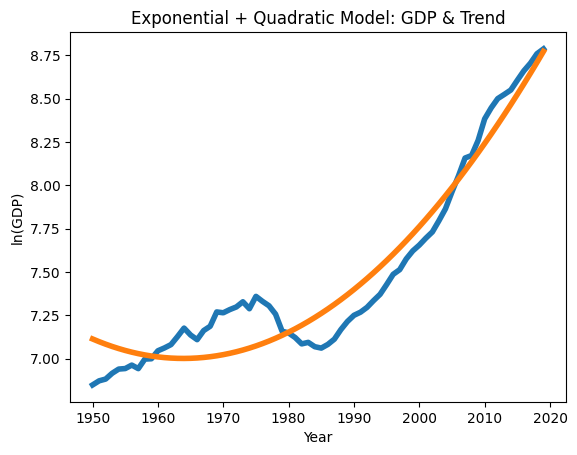

In [104]:
# 3.4) Exponential + Quadratic Model
# The dependent variable is ln(GDP), which corresponds to exponential growth of GDP.

# First regressor x1 is T x 1 vector of ones
# Second regressor x2 is the vector 1, 2, ..., T
# Third regressor x3 is the vector of squared time values: 1^2, 2^2, ..., T^2
x1 = np.empty(T)  # initialize an empty vector for the first regressor
x2 = np.empty(T)  # initialize an empty vector for the second regressor
x3 = np.empty(T)  # initialize an empty vector for the quadratic term

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1  # linear time term
    x3[t] = (t + 1) ** 2  # quadratic time term

# Use the log of GDP as the dependent variable (ln(GDP))
ln_Y = np.log(Y)

# Get coefficients for the exponential + quadratic model
a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(ln_Y, x1, x2, x3)

# Initialize predicted values ln_yhat for all years
ln_Yhat_exp_quad = np.empty(T_all)

# Compute predicted trend for all years using the model ln(Y) = a + b*t + c*t^2
for t in range(T_all):
    ln_Yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t + 1) ** 2

# Convert predicted values from log-units back to levels (GDP)
Yhat_exp_quad = np.exp(ln_Yhat_exp_quad)

# Plot the results
plt.figure()
plt.plot(data["year"], np.log(data["rgdpe_pc"]), label="Observed ln(GDP)", linewidth=4)
plt.plot(data["year"], np.log(Yhat_exp_quad), label="Trend (Exponential + Quadratic)", linewidth=4)

# Labels and title
plt.xlabel("Year")
plt.ylabel("ln(GDP)")
plt.title("Exponential + Quadratic Model: GDP & Trend")

##What we have done:
#In Subpart A.3, we computed four different specifications to identify the best fit for India's GDP trend. We selected the third model, the exponential linear model, as it appears to provide the most accurate description of the GDP trend. However, due to a short-term recession that occurred during this period, we divided the data into three distinct subperiods and analyzed each separately.
#From 1950 to 2019, India's GDP generally followed an increasing trend, but the growth rate varied across the subperiods. In the first subperiod, the growth rate was slower, and during the second subperiod, an economic crisis caused a dip in the trend. In the third subperiod, GDP growth returned to its previous trend but with a higher growth rate, likely due to several influencing factors, which we will discuss in the following sections.

#While the raw data shows these fluctuations, we will use economic theory to clarify the underlying causes of these changes and explore what factors drove the observed trends.

##part B
TFP calculation (assuming alpha = 0.3), then check the robustness of our model for other values of alpha.

In [105]:
##part B
# Y = (K**alpha)*(AL)**(1-alpha) Eq. 1
# Y: real GDP (rgdpna)
# A: TFP 
# L: the number of employed workers (emp)
# K: the capital stock at constant 2017 national prices (rnna)

# From equation 1 we get
# A = ((Y/(K**alpha))**(1/(1-alpha)))/L Eq. 2

data2 = data0.loc[data0['country'] == "India", ["country", "year", "rgdpna", "emp", "rnna", "hc"]]
alpha = 0.3
#alpha = 0.6 #alpha robustness

data2['TFP (alpha)'] = (data2['rgdpna'] / (data2['rnna']**(alpha) * data2['emp']**(1-alpha)))**(1/(1-alpha))
print('alpha =',alpha)
print("\n\t ========= TFP =========")
print(data2['TFP (alpha)']) 
print("\n")

data2['TFP_hc (alpha)'] = (data2['rgdpna'] / (data2['rnna'] * alpha * (data2['hc'] * data2['emp']) * (1 - alpha))) ** (1 / (1 - alpha))
print('alpha =',alpha)
print("\n\t ========= TFP with hc =========")
print(data2['TFP_hc (alpha)']) 

alpha = 0.3

	 ========= TFP =========
5460     1384.606902
5461     1373.554168
5462     1437.020362
5463     1510.643871
5464     1529.120968
            ...     
5525     8260.757917
5526     9009.144894
5527     9588.471711
5528    10080.072430
5529    10314.975555
Name: TFP (alpha), Length: 70, dtype: float64


alpha = 0.3

	 ========= TFP with hc =========
5460    0.001753
5461    0.001638
5462    0.001650
5463    0.001654
5464    0.001560
          ...   
5525    0.000068
5526    0.000069
5527    0.000068
5528    0.000066
5529    0.000062
Name: TFP_hc (alpha), Length: 70, dtype: float64
